<a href="https://colab.research.google.com/github/MMoltira/KKU_data_mining/blob/master/Kmeanclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Data
การสุ่ม data ขึ้นมาเอง

In [ ]:
from sklearn.datasets import make_blobs #make_blobs คือ สุ่มเดต้าขึ้นมาเป็นกลุ่มๆ

In [ ]:
X,y=make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)

In [ ]:
X.shape #300แถว 2หลัก จากที่กำหนด n_samples=300 และ n_features=2

(300, 2)

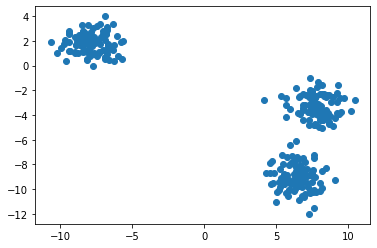

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

#Import

In [ ]:
from sklearn.cluster import KMeans

#Define

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่มเท่าไหร่

#Train

In [ ]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#Predict

In [ ]:
label=KMclust.predict(X) # predict ว่าอยู่ในกลุ่มไหน

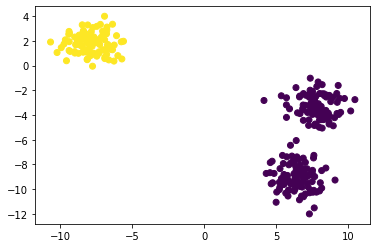

In [ ]:
plt.scatter(X[:,0], X[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

#Color
ทำการจัดกลุ่มสี เพื่อให้แทนค่าสีที่น้อยลง

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 #ใช้เกี่ยวกับรูปภาพ
import os #osเพื่อจัดการไฟล์

In [ ]:
img = cv2.imread(os.path.join(path,'Nong.jpg'))

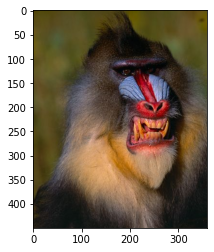

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [ ]:
RGB_img.shape

(450, 360, 3)

#COUNT
เช็คว่ามีทั้งหมดกี่สี

In [ ]:
import numpy as np

In [ ]:
np.unique(RGB_img).shape #นับสีทั้งหมดว่ามีกี่สีที่ไม่ซ้ำกัน โดยใช้ np.unique

(256,)

#Use K-mean to reduce color from 256 color to 8 colors

จะทำให้เหลือแค่ 8 สี

In [ ]:
#Define
myQuantize=KMeans(n_clusters=8)

In [ ]:
#Train
myQuantize.fit(RGB_img)

ตรง Train Error เพราะว่า ปกติจะมีแค่จำนวนแถวและคอลัม แต่ในที่นี้มีการเพิ่มจำนวน array 3 เข้ามา ซึ่งมันรับค่าได้แค่2ตัว ในปกติคือแถวและคอลัม จึงต้องทำการยุบรวมแถวและคอลัมให้เป็นอันเดียวกัน เพื่อที่จะอ่าน array ได้

In [ ]:
img_row=np.reshape(RGB_img,(450*360,3))
img_row

array([[84, 70,  9],
       [84, 70,  9],
       [83, 69,  8],
       ...,
       [13, 19, 17],
       [13, 19, 17],
       [11, 17, 15]], dtype=uint8)

In [ ]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#predict
res=myQuantize.predict(img_row)

In [ ]:
res

array([6, 6, 6, ..., 2, 2, 2], dtype=int32)

#Get cluster centers

ค่าสีที่ควรจะเป็น ว่าสีที่ 1 2 3..... 8 ว่าควรจะเป็นสีอะไร

In [ ]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 64.69297488,  49.23607514,  37.1079048 ],
       [202.97865794, 147.41780687, 103.72628478],
       [ 25.77109523,  22.16677218,  17.90099786],
       [ 95.47604606,  83.36478226,  73.29232811],
       [142.49056736, 115.16901901,  96.034237  ],
       [169.15774766,  81.52619813,  44.27343859],
       [ 89.85532995,  79.80719724,  32.52254804],
       [125.11396913, 137.12267511, 179.13692125]])

In [ ]:
Clus_cen.shape

(8, 3)

## Map color name back to image

In [ ]:
new_img=np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:]=Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [ ]:
new_img_=new_img/255 #255 คือ ค่าสี

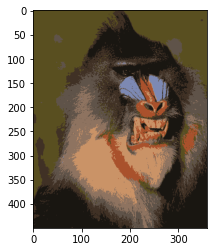

In [ ]:
plt.imshow(new_img_)